### Part I EDA
- 選取資料 - 深耕客服資料檔
- 目標 - 了解大部分的客戶被callout的狀況

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
df = pd.read_csv('data/野村客服.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
df.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA2765,20180102 141000,[ECP] 去電確認開戶文件 客戶說後來去買美元保單就不開戶了
1,Call Out,AA3910,20180102 144300,[ECP]不方說 IPO MAIL
2,Call Out,AA3167,20180102 154500,[ECP] IPO 忙 先MAIL
3,Call Out,AA2355,20180102 194359,家庭戶 媽媽說女兒不開了，因為打工收入不穩定
4,Call Out,AA2778,20180103 111132,推Q1


In [4]:
for i in df.index:
    df.at[i, '資料日期'] = datetime.strptime(df.at[i, '資料日期'], '%Y%m%d %H%M%S') 

In [5]:
df_day = pd.DataFrame()
for i in range(365):
    df_day.at[i, 'count'] = 0
df_day.index = pd.date_range(start='1/1/2018', end='12/31/2018')

In [6]:
df_copy = df.copy()

In [7]:
for i in range(len(df_copy)):
    df_copy.at[i, '資料日期'] = datetime.strftime(df_copy.at[i, '資料日期'],'%Y-%m-%d')

In [8]:
for i in range(len(df_copy['資料日期'].value_counts())):
    df_day.loc[df_copy['資料日期'].value_counts().index[i]] = df_copy['資料日期'].value_counts()[i]

<Figure size 1152x648 with 0 Axes>

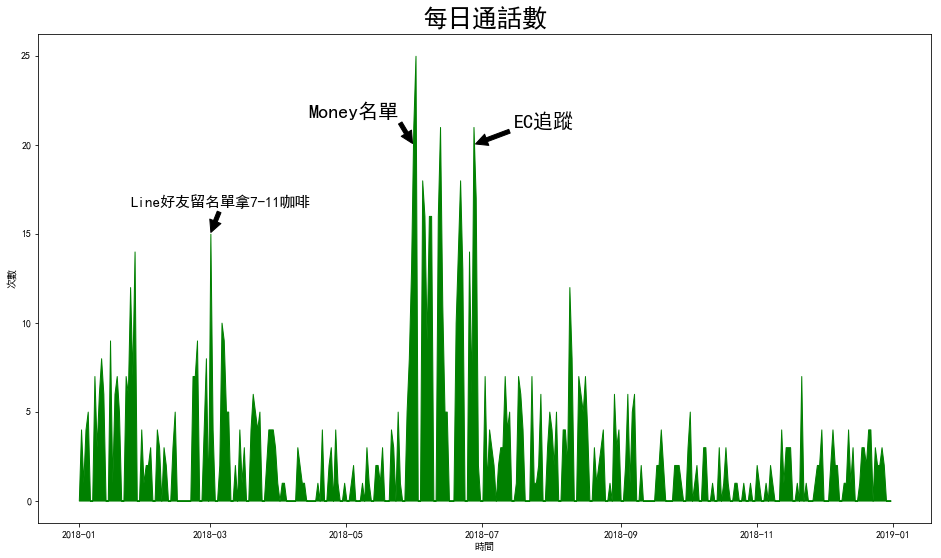

In [14]:

# Create data
x = df_day.index
y = df_day['count']
plt.figure(figsize = (16, 9))
fig, ax = plt.subplots(figsize = (16, 9))
# Make the plot
ax.plot(x, y, color='black', lw=0)
ax.annotate('Line好友留名單拿7-11咖啡',
            xy=('2018-03-01', 15), xycoords='data',size = 15,
            xytext=(100, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('Money名單',
            xy=('2018-05-31', 20), xycoords='data',size = 20,
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.annotate('EC追蹤',
            xy=('2018-06-27', 20), xycoords='data',size = 20,
            xytext=(100, 15), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')
ax.fill_between(x, 0, y, alpha=1, color = 'g')
plt.title('每日通話數', size = 25)
plt.xlabel('時間')
plt.ylabel('次數')
plt.savefig("每日通話數", dpi=100)
#ax.set(xlim=(0, len(x) - 1), ylim=(0, None), xticks=x)

In [15]:
df_day.count

<bound method DataFrame.count of             count
2018-01-01    0.0
2018-01-02    4.0
2018-01-03    1.0
2018-01-04    4.0
2018-01-05    5.0
2018-01-06    0.0
2018-01-07    0.0
2018-01-08    7.0
2018-01-09    3.0
2018-01-10    6.0
2018-01-11    8.0
2018-01-12    6.0
2018-01-13    0.0
2018-01-14    0.0
2018-01-15    9.0
2018-01-16    1.0
2018-01-17    6.0
2018-01-18    7.0
2018-01-19    5.0
2018-01-20    0.0
2018-01-21    0.0
2018-01-22    7.0
2018-01-23    6.0
2018-01-24   12.0
2018-01-25    7.0
2018-01-26   14.0
2018-01-27    0.0
2018-01-28    0.0
2018-01-29    4.0
2018-01-30    1.0
...           ...
2018-12-02    0.0
2018-12-03    0.0
2018-12-04    2.0
2018-12-05    4.0
2018-12-06    2.0
2018-12-07    2.0
2018-12-08    0.0
2018-12-09    0.0
2018-12-10    1.0
2018-12-11    1.0
2018-12-12    4.0
2018-12-13    1.0
2018-12-14    3.0
2018-12-15    0.0
2018-12-16    0.0
2018-12-17    1.0
2018-12-18    3.0
2018-12-19    3.0
2018-12-20    2.0
2018-12-21    4.0
2018-12-22    4.0
2018-12-23   

### 每位客戶的所有callout時間

In [16]:
df_time = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    for j in df[df['Unique ID'] == i].reset_index().index :
        df_time.at[i, j] = df[df['Unique ID'] == i].reset_index().at[j, '資料日期']
df_time.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA4372,2018-01-24 17:37:44,2018-01-24 18:28:21,2018-01-25 10:01:00,2018-01-26 10:04:00,2018-01-29 18:16:00,2018-02-26 10:34:00,2018-02-26 10:47:00,2018-03-07 10:55:00,2018-03-29 14:12:00,2018-06-01 10:11:00,2018-06-12 16:35:00,2018-06-20 16:50:00,2018-06-29 10:18:00,2018-08-24 17:32:00
AA2986,2018-02-27 18:09:27,2018-02-27 18:23:32,2018-03-01 17:27:00,2018-03-06 14:36:00,2018-03-14 15:22:00,2018-03-14 15:24:03,2018-03-16 13:24:19,2018-03-21 14:31:00,NaT,NaT,NaT,NaT,NaT,NaT
AA3336,2018-06-07 11:29:31,2018-06-15 10:16:00,2018-06-15 10:35:00,2018-06-19 13:02:44,2018-06-27 09:58:00,2018-07-05 14:37:00,2018-07-08 10:55:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AA0329,2018-06-26 14:16:00,2018-07-05 17:40:00,2018-07-10 14:41:00,2018-07-18 17:34:00,2018-07-19 14:39:00,2018-10-22 11:25:00,2018-11-27 17:43:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT
AA1538,2018-03-27 10:34:19,2018-03-27 11:12:35,2018-06-25 16:46:49,2018-06-25 17:31:30,2018-07-23 14:21:25,2018-07-23 16:32:35,2018-08-14 10:22:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [17]:
df_time[df_time.index == 'AA8683']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA8683,2018-03-20 14:54:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


### 每位客戶的所有callout內容

In [18]:
df_event = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    for j in df[df['Unique ID'] == i].reset_index().index :
        df_event.at[i, j] = df[df['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_event.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5%,cherry 人及美都有機會,[ECP]確認文件以掛號寄出,[ECP]0.4% IPO 美1萬3,"[ECP]電確,家管,客人說四年期債申購款已匯",[ECP]亞債人民幣10萬要求0.3%,[ECP]10萬人民幣給0.3% 下週單筆,"[ECP]ABHY ABP 人民幣3月低到期,到時可能會再加一點",[ECP]人民幣 亞高130萬,[ECP]沒信心 沒錢 IPO,"[ECP]帳號過長需修正,掛退","[ECP]電確,有要異動指扣帳戶.",[ECP]本來想要賣4年期 有資需求,[ECP]家庭戶馬X璇319381 請我推基金給他 穩健型都可以
AA2986,"現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中...",MGM 戶號318359,"[ECP]確認表單要寄送地址,要求放二支觸控筆","[ECP]文件今天收到,還沒看,有問題會再來電,提醒儘快寄回才能參加家人推薦MGM",[ECP]推Q1,開戶文件有收到，現在來寫,女兒先不辦，現場客戶，改為兆豐，下週三下午約4:00會再來現場,[ECP]等有來101聽演講再順道過來，要改為兆豐銀行台外幣，不確定哪一天，會事前打過來給我...,NaN,NaN,NaN,NaN,NaN,NaN
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行","[ECP]follow 名單,有在銀行買,問和銀行差異及手續費,會再想想是不是要寄回,指扣為...",[ECP]要穩 IPO 中債會參考 已MAIL 好好 會再看,已mail 中債,[ECP]下週會寄回,[ECP]白天不方便接 請晚上打,[ECP]下周打,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0329,[ECP] 手機本人，人不錯，庫存為新興高收債組合，說明中國境內債，似乎有意願，但現在比較忙...,[ECP] 表示沒有收到書面的文宣，通訊地址是正確的，請我再寄一次，告知單筆20萬有零手續費...,[ECP] 7/10 14:43手機本人，告知中國境內債週三開始募集，今日16:00可以交易...,[ECP] 7/18 17:35手機終於聯繫上本人，提醒募集僅到7/19 16:00前喔，客...,[ECP] 客戶還是沒下單，再次手機說明中國境內債募集僅到下午四點，客戶推說陸股跌很多，已說...,[ECP] 10/22 17:40上午撥打客戶請我晚點撥，後續聯繫手機家電應該是公電未接，公...,[ECP] 來電IB表示擔心市場，回電手機安撫並說明，請續扣，也推ROBO，有意願參考（平日...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA1538,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,家庭戶,娘會寄回開戶 二戶 推中國 環球,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_event.to_excel("test.xlsx",sheet_name='Sheet_name_1')

### 每個客戶平均被聯絡的間隔時間(天)

In [20]:
df_event_time = pd.DataFrame()
for i in df_time.index:
    if not pd.isna(df_time.loc[i][1]):
        df_event_time.at[i, 'mean daydelta'] =  np.mean([ df_time.loc[i][j] - df_time.loc[i][j-1] for j in range(1, len(df_time.loc[i])) if not pd.isna(df_time.loc[i][j])]).days
df_event_time.head()

,mean daydelta
AA4372,16.0
AA2986,3.0
AA3336,5.0
AA0329,25.0
AA1538,23.0


In [21]:
len(df_event)

572

### 每個客戶平均被聯絡的間隔時間(天) - 敘述統計

In [22]:
pd.DataFrame(df_event_time['mean daydelta'].describe())

,mean daydelta
count,222.000000
mean,40.018018
std,54.461657
min,0.000000
25%,8.000000
50%,17.000000
75%,54.250000
max,302.000000


In [23]:
print("%.2f"%df_event_time['mean daydelta'].describe()['count'])

222.00


In [24]:
des_lst = []
for i in df_event_time['mean daydelta'].describe().index:
    des_lst.append(i+'    '+str("%.4f"%df_event_time['mean daydelta'].describe()[i]+'\n'))

### 每個客戶平均被聯絡的間隔時間(天) - 次數分佈圖

(array([38., 12., 21., 15., 21.,  6., 12., 13.,  9.,  1.,  0.,  2.,  2.,
         7.,  3.,  1.,  2.,  1.,  8.,  0.,  1.,  2.,  3.,  0.,  1.,  1.,
         0.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  5.,  0.,  1.,  2.,
         0.,  0.,  1.,  0.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  0.  ,   3.02,   6.04,   9.06,  12.08,  15.1 ,  18.12,  21.14,
         24.16,  27.18,  30.2 ,  33.22,  36.24,  39.26,  42.28,  45.3 ,
         48.32,  51.34,  54.36,  57.38,  60.4 ,  63.42,  66.44,  69.46,
         72.48,  75.5 ,  78.52,  81.54,  84.56,  87.58,  90.6 ,  93.62,
         96.64,  99.66, 102.68, 105.7 , 108.72, 111.74, 114.76, 117.78,
        120.8 , 123.82, 126.84, 129.86, 132.88, 135.9 , 138.92, 141.94,
  

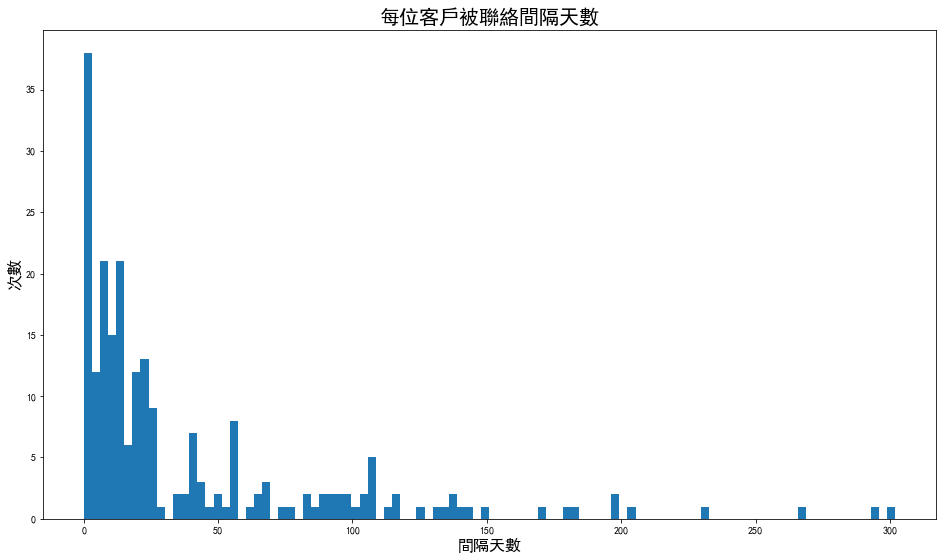

In [25]:
plt.figure(figsize = (16, 9))
plt.rcParams['font.sans-serif']=['SimHei']
plt.title('每位客戶被聯絡間隔天數', size = 20)
plt.xlabel('間隔天數', size = 16)
plt.ylabel('次數', size = 16)
#t = (''.join(des_lst))

plt.hist([i for i in df_event_time['mean daydelta'] if not pd.isna(i)], bins=100)
#plt.text(0.80, 0.76, t, size= 'xx-large', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#plt.savefig("每位客戶被聯絡間隔天數", dpi=100)

_由上圖與敘述統計可知，大部分的間隔天數都在50天內_

### 每個客戶call out次數 - 敘述統計

In [26]:
df['Unique ID'].value_counts().describe()

count    572.000000
mean       1.746503
std        1.314238
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       14.000000
Name: Unique ID, dtype: float64

### call out次數為1之客戶

In [27]:
df_freq_1 = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    if df['Unique ID'].value_counts()[i] == 1:
        df_freq_1 = pd.concat([df_freq_1, df[df['Unique ID'] == i]], ignore_index=True)
df_freq_1.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA3423,2018-06-12 14:24:12,"Money 電子報訂閱名單,寄送退休專刊,有需要開戶會再來電"
1,Call Out,AA3447,2018-06-13 14:41:23,"Money雜誌名單,客戶只有郵局的帳戶."
2,Call Out,AA2983,2018-02-27 16:34:07,LINE留資料送咖啡 先寄開戶 款二華銀
3,Call Out,AA1368,2018-03-02 14:42:21,"問買回,推EC"
4,Call Out,AA2868,2018-01-25 17:44:00,"[ECP]非美國稅務居民,風險勾錯,Cherry要採快遞請客戶修改"


In [28]:
df_freq_1

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA3423,2018-06-12 14:24:12,"Money 電子報訂閱名單,寄送退休專刊,有需要開戶會再來電"
1,Call Out,AA3447,2018-06-13 14:41:23,"Money雜誌名單,客戶只有郵局的帳戶."
2,Call Out,AA2983,2018-02-27 16:34:07,LINE留資料送咖啡 先寄開戶 款二華銀
3,Call Out,AA1368,2018-03-02 14:42:21,"問買回,推EC"
4,Call Out,AA2868,2018-01-25 17:44:00,"[ECP]非美國稅務居民,風險勾錯,Cherry要採快遞請客戶修改"
5,Call Out,AA2920,2018-02-01 17:02:00,[ECP]打公司本人接 講1Q優惠及新春活動
6,Call Out,AA3374,2018-06-08 13:55:39,Money名單分配 富邦業務
7,Call Out,AA3226,2018-05-31 17:31:01,"Money 電子報訂閱名單,寄送退休專刊,忙沒空核對地址,"
8,Call Out,AA3714,2018-12-21 11:06:16,因跌就不用急 認同低點 會寄回 EC
9,Call Out,AA2872,2018-01-18 16:42:19,有找到客戶了 只想問經理人的經歷 講完就說謝謝 就將電話掛斷


In [307]:
count = 0
for i in range(len(df_freq_1)):
    if 'Money' in df_freq_1.at[i, '客戶事件描述']:
        count += 1
count

93

In [308]:
count = 0
for i in range(len(df)):
    if 'Money' in df.at[i, '客戶事件描述']:
        count += 1
count

148

In [317]:
df_freq_2 = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    if df['Unique ID'].value_counts()[i] == 2:
        df_freq_2 = pd.concat([df_freq_2, df[df['Unique ID'] == i]], ignore_index=True)
df_freq_2

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA3306,2018-06-05 14:27:27,"Money 電子報訂閱名單,寄送退休專刊,同意寄開戶表單,開場時有?疑為何有電話"
1,Call Out,AA3306,2018-06-14 16:41:00,"[ECP]follow,沒空聽,也不會開戶"
2,Call Out,AA3223,2018-05-31 16:54:05,Money名單分配中信
3,Call Out,AA3223,2018-06-27 16:11:00,[ECP]ec追蹤 再研究一下
4,Call Out,AA3421,2018-06-12 14:12:59,"Money 電子報訂閱名單,寄送退休專刊,台銀"
5,Call Out,AA3421,2018-06-20 15:54:00,"[ECP]money follow ,不開戶,態度冷.....淡"
6,Call Out,AA3249,2018-06-01 15:17:04,Money名單分配 日盛
7,Call Out,AA3249,2018-06-27 15:27:00,[ECP]EC追蹤 婉拒
8,Call Out,AA3229,2018-06-01 10:13:00,Money名單分配 款台外 轉介559
9,Call Out,AA3229,2018-06-01 10:29:33,轉介-idris，推Q2


In [313]:
count = 0
for i in range(len(df_freq_2)):
    if 'Money' in df_freq_2.at[i, '客戶事件描述']:
        count += 1
count

43

In [315]:
df_freq_3 = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    if df['Unique ID'].value_counts()[i] == 3:
        df_freq_3 = pd.concat([df_freq_3, df[df['Unique ID'] == i]], ignore_index=True)
count = 0
for i in range(len(df_freq_3)):
    if 'Money' in df_freq_3.at[i, '客戶事件描述']:
        count += 1
count

9

In [316]:
df_freq_4 = pd.DataFrame()
for i in df['Unique ID'].value_counts().index:
    if df['Unique ID'].value_counts()[i] == 4:
        df_freq_4 = pd.concat([df_freq_4, df[df['Unique ID'] == i]], ignore_index=True)
count = 0
for i in range(len(df_freq_4)):
    if 'Money' in df_freq_4.at[i, '客戶事件描述']:
        count += 1
count

1

In [389]:
money_lst = []
for freq in range(1, 15):
    df_freq = pd.DataFrame()
    for i in df['Unique ID'].value_counts().index:
        if df['Unique ID'].value_counts()[i] == freq:
            df_freq = pd.concat([df_freq, df[df['Unique ID'] == i]], ignore_index=True)
    count = 0
    for i in range(len(df_freq)):
        if 'Money' in df_freq.at[i, '客戶事件描述']:
            count += 1
    money_lst.append(count)
money_lst

[93, 43, 9, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [392]:
sum(money_lst)

148

In [391]:
from highcharts import Highchart
H = Highchart(width=750, height=600)

money_data = money_lst

options = {'title': {
        'text': 'Money訂閱用戶與客服聯絡次數'
    },
    'xAxis': {
        'categories': list(range(1, 15)),
        'title': {
            'text': None
        }
    },
    'yAxis': {
        'min': 0,
        'title': {
            'text': 'count',
            'align': 'high'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'tooltip': {
        'valueSuffix': ' people'
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'backgroundColor': "((Highcharts.theme && Highcharts.theme.legendBackgroundColor) || '#FFFFFF')",
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

H.add_data_set(money_data, 'bar', 'frequency')

H

### call out次數分佈圖

In [393]:
from highcharts import Highchart
H = Highchart(width=750, height=600)

data1 = list(df['Unique ID'].value_counts().value_counts())

options = {'title': {
        'text': '每位客戶被撥打的頻率'
    },
    'xAxis': {
        'categories': list(df['Unique ID'].value_counts().value_counts().index),
        'title': {
            'text': None
        }
    },
    'yAxis': {
        'min': 0,
        'title': {
            'text': 'count',
            'align': 'high'
        },
        'labels': {
            'overflow': 'justify'
        }
    },
    'tooltip': {
        'valueSuffix': ' people'
    },
    'legend': {
        'layout': 'vertical',
        'align': 'right',
        'verticalAlign': 'top',
        'x': -40,
        'y': 80,
        'floating': True,
        'borderWidth': 1,
        'backgroundColor': "((Highcharts.theme && Highcharts.theme.legendBackgroundColor) || '#FFFFFF')",
        'shadow': True
    },
    'credits': {
        'enabled': False
    },
    'plotOptions': {
        'bar': {
            'dataLabels': {
                'enabled': True
            }
        }
    }
}

H.set_dict_options(options)

H.add_data_set(data1, 'bar', 'frequency')

H

<img src="images/callout次數分佈圖.png" />

_由上圖可知，大部分的call out客戶次數都在2次以內_

### Part II 文字探勘與視覺化
- 目標
    - 了解客服正在力推的產品
    - 了解客服用詞
    - 使用TDM、共線圖與熱度圖分析字詞間的關聯性

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime
import jieba.analyse
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [30]:
stopWords = []
with open('data/stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [31]:
stoplst = [' ', '\xa0']
for words in stoplst:
    stopWords.append(words)

In [32]:
with open('data/addWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/dj/wmbw561s10sdm1y3qgh7w_700000gn/T/jieba.cache
Loading model cost 1.318 seconds.
Prefix dict has been built succesfully.


In [33]:
df_terms = pd.read_csv('data/野村客服.csv')
df_terms.drop('Unnamed: 0', axis = 1, inplace = True)

In [34]:
df_terms.head()

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA2765,20180102 141000,[ECP] 去電確認開戶文件 客戶說後來去買美元保單就不開戶了
1,Call Out,AA3910,20180102 144300,[ECP]不方說 IPO MAIL
2,Call Out,AA3167,20180102 154500,[ECP] IPO 忙 先MAIL
3,Call Out,AA2355,20180102 194359,家庭戶 媽媽說女兒不開了，因為打工收入不穩定
4,Call Out,AA2778,20180103 111132,推Q1


In [35]:
error_lst = []
terms=[]
for i in range(len(df_terms['客戶事件描述'])):
    try:
        for j in list(jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)):
            if j not in stopWords:
                terms.append(j)
    except:
        error_lst.append([i, df_terms['客戶事件描述'][i]])

In [36]:
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)[:10]

[('客戶', 171),
 ('推', 159),
 ('Money', 148),
 ('開戶', 136),
 ('名單', 85),
 ('退休專刊', 83),
 ('電子報訂閱名單', 78),
 ('寄送', 77),
 ('追蹤', 75),
 ('買', 67)]

### 文字雲

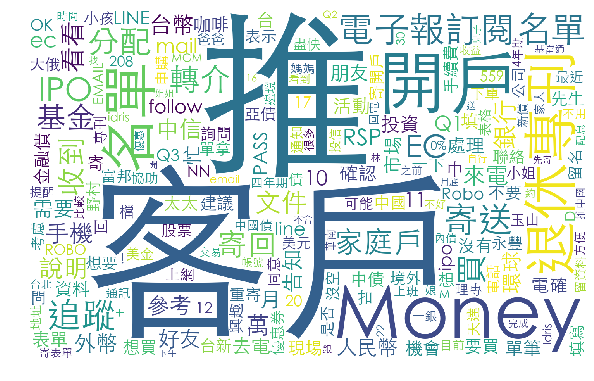

<Figure size 432x288 with 0 Axes>

In [37]:
wc = WordCloud(background_color = "white", width = 1440, height = 900, margin= 2, font_path="STHeiti Light.ttc")
wc.generate_from_frequencies(Counter(terms))
plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()
plt.savefig("文字雲", dpi=100)

_由文字雲可知，業務非常積極推薦產品，許多callout客戶都是尋求開戶的幫助，另有一大部分為退休專刊的callout名單_

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import jieba
import codecs
import jieba.posseg as pseg

In [39]:
names = {}          
relationships = {}  
lineNames = []  
for i in range(len(df_terms['客戶事件描述'])):
    try:
        poss = jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:    
                relationships[w] = {}            
    except:
        pass

In [40]:
term_dic = dict()
for sentence in lineNames:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [41]:
for i in range(len(lineNames)):
    for term1 in term_dic:
        num = 0
        for term2 in lineNames[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][df_terms['客戶事件描述'][i]] = num

### TDM

In [42]:
TDM = pd.DataFrame.from_dict(term_dic)
TDM.head()

,去電,確認,開戶,文件,客戶,後來,買,美元,保單,不方,...,投資金額,NTD20M,全國性,附給,不定期,併,房貸,放長,已下,50000
10/1 10:52手機本人表示正在忙，前已建立潛在，A174660，請我晚點撥，強基金九月名單客戶,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10/17 11:53庫存全品+環球+巴西無RSP，建議重新恢復環球契約，客戶說再看看，EMAIL要改為先生的，,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10/18 16:37已引導完成---15:58手機本人，表示投資都是爸爸處理的，撥家裡終於找到爸爸-林O欽15754，爸爸表示目前兒子再考公職，沒有工作，所以停扣，等有工作就會扣了，覺得亞太複合高收益債券表現不好，已說明，另推十月品牌月活動，爸爸要把自己的愛爾蘭美高收不定額改為D檔，請我引導交易，後續去電家電就不通…持續連繫,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11/28 14:46來電IB表示要開戶，想要買台灣高股息，設定台新 台外幣 境內外 轉Idris,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11701王O如小孩,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Co-Occurrence Matrix

In [43]:
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_terms['客戶事件描述'])):
    try:
        poss = jieba.cut(df_terms['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None and w not in stopWords:
                names[w] = 0
                relationships[w] = {}
                names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 15]

In [44]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,好友,留名,確認,11,ec,咖啡,收到,中信,家庭戶,客戶,...,Money,EC,文件,寄回,追蹤,買,台幣,銀行,IPO,台
好友,NaN,19.0,NaN,20.0,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
留名,19.0,NaN,NaN,17.0,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
確認,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,20.0,17.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN


In [45]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

_使用sigmoid函式縮小最大與最小距離之差距，讓有些關聯太大的字不要擠在一起_

### 共線圖

/Users/apple/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


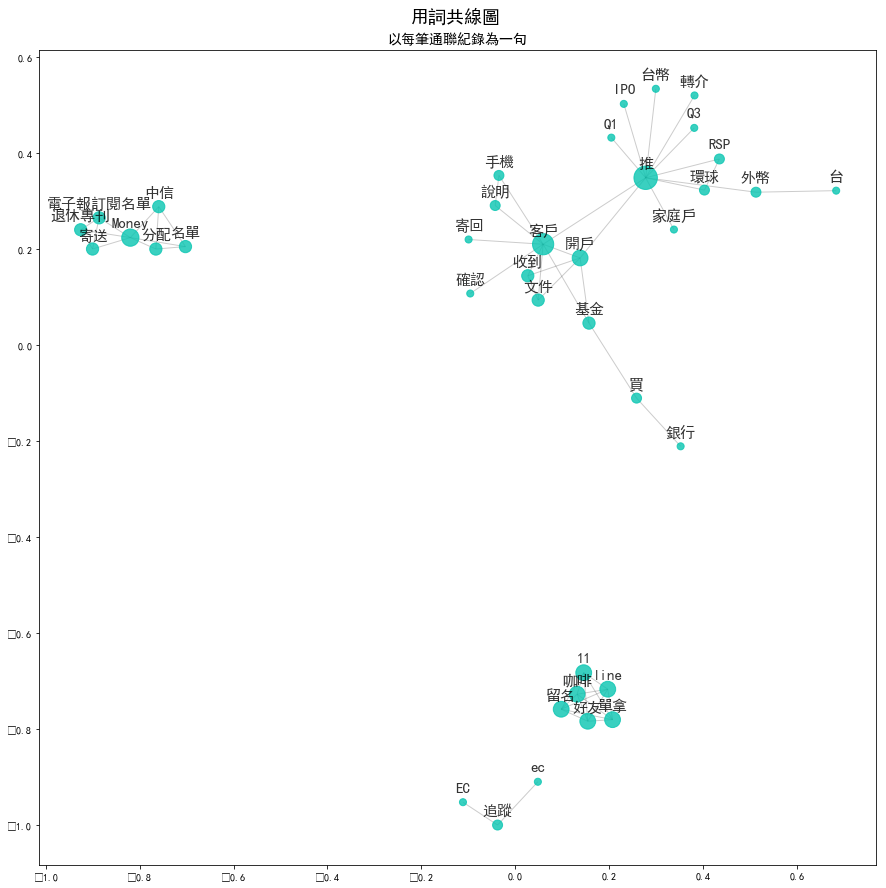

In [46]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每筆通聯紀錄為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("用詞共線圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

- 以每筆通聯紀錄為分析基準，發現主要有幾種不同類型的通話內容：
    - 推產品：環球、外幣、IPO等
    - 開戶與一般客戶事項
    - 電子報訂閱名單的callout
    - 711咖啡活動callout
    - 電子交易(EC)追蹤

### Heatmap

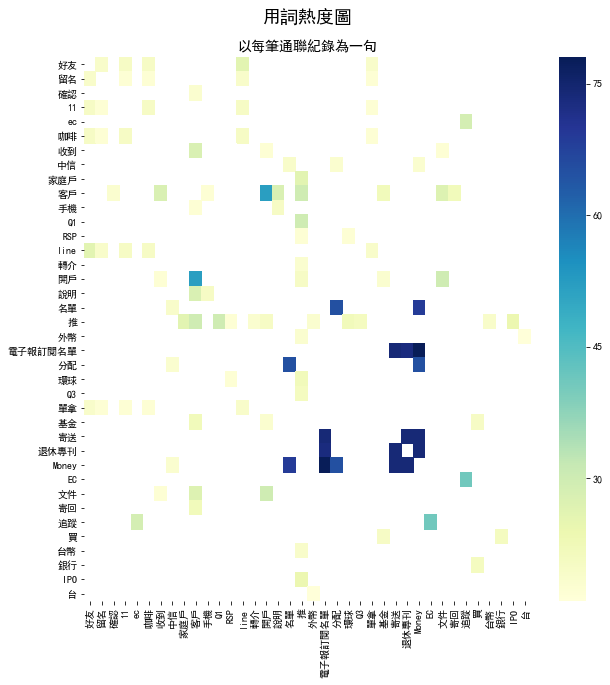

In [47]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')
plt.title('以每筆通聯紀錄為一句', size = 14)
plt.suptitle('用詞熱度圖',x = 0.435,y=0.95, fontsize=18)
plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

### 以每個客戶為基準，再做一次，觀察有沒有改變

In [48]:
df_event = pd.DataFrame()
for i in df_terms['Unique ID'].value_counts().index:
    for j in df_terms[df_terms['Unique ID'] == i].reset_index().index :
        df_event.at[i, j] = df_terms[df_terms['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_by_id = pd.DataFrame()
df_by_id['客戶事件描述'] = df_event[0]
df_by_id.index = df_event.index
for i in df_event.index:
    df_by_id.at[i, '客戶事件描述']  = ' '.join([str(j) for j in df_event.loc[i] if not pd.isna(j)])

In [49]:
df_by_id.head()

,客戶事件描述
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5...
AA2986,"現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中..."
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行 [ECP]follow 名單,有..."
AA0329,[ECP] 手機本人，人不錯，庫存為新興高收債組合，說明中國境內債，似乎有意願，但現在比較忙...
AA1538,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫 208 娘298803廖○霞 去電娘29...


In [50]:
names = {}          
relationships = {}  
lineNames = []     

for i in range(len(df_by_id['客戶事件描述'])):
    try:
        poss = jieba.cut(df_by_id['客戶事件描述'][i], cut_all = False)
        lineNames.append([])
        for w in poss:
            if w not in stopWords:
                lineNames[-1].append(w)        
            if names.get(w) is None:
                names[w] = 0
            relationships[w] = {}
            names[w] += 1   
    except:
        pass

for line in lineNames:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_unicodes = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 30]

In [51]:
np.random.shuffle(co_occur_by_unicodes)
temp_matrix = pd.DataFrame()
for i in co_occur_by_unicodes:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_unicodes = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_unicodes.at[i, j] = temp_matrix.at[i, j]

In [52]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_unicodes = [i[2] for i in co_occur_by_unicodes]
co_occur_by_unicodes_sig = []
for i in co_occur_by_unicodes:
    co_occur_by_unicodes_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_unicodes))/np.std(count_by_unicodes))])

/Users/apple/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


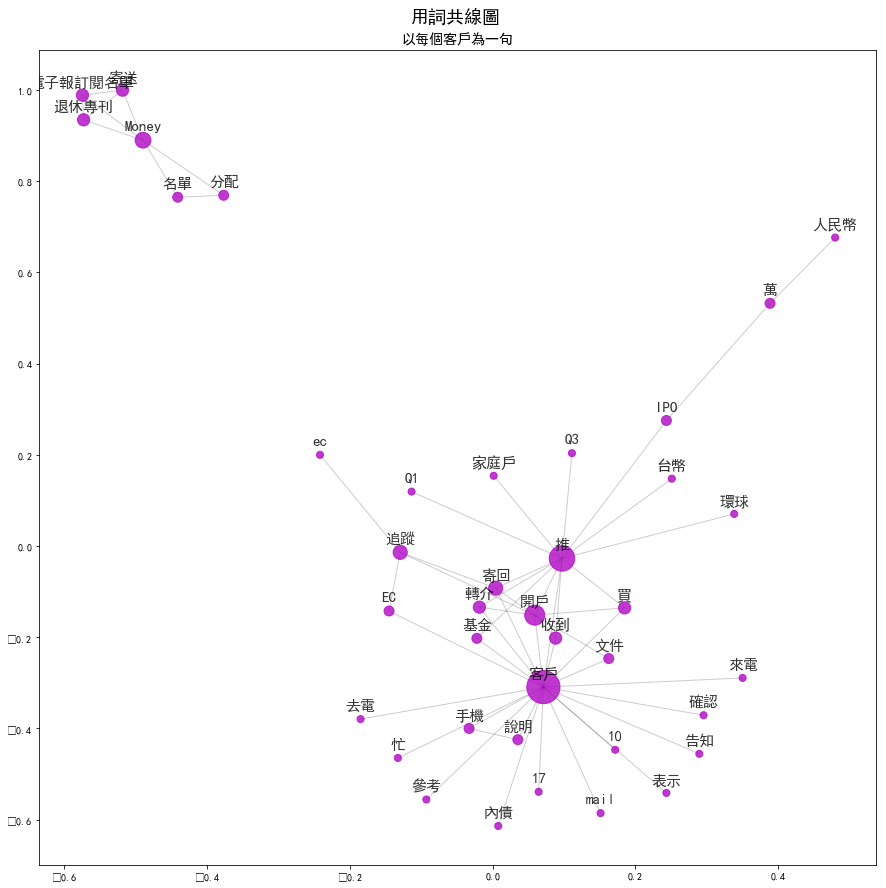

In [53]:
plt.figure(figsize=(15,15))
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_unicodes_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8, node_size=[val*50 for (node, val) in g.degree()], node_color='#b108c5')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2) 
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.title('以每個客戶為一句', size = 14)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=18)
#plt.savefig("image/用詞共線圖_以每個客戶為一句.png", dpi=100)
plt.show()

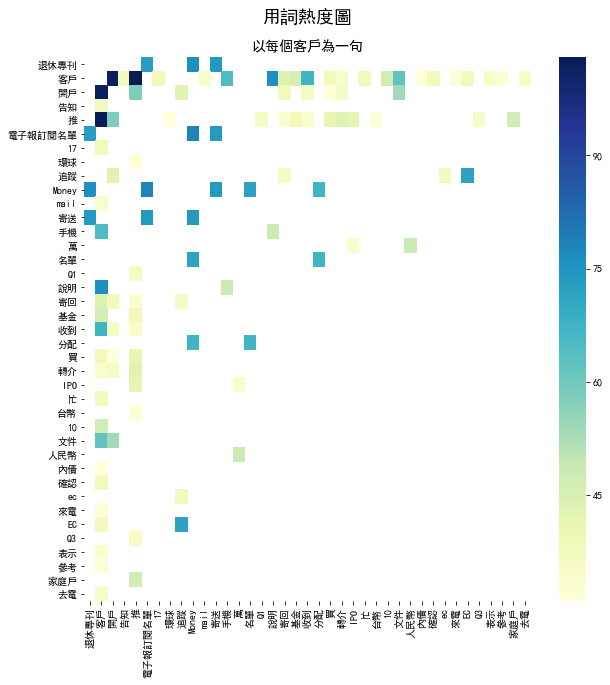

In [54]:
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_unicodes,cmap='YlGnBu')
plt.title('以每個客戶為一句', size = 14)
plt.suptitle('用詞熱度圖',x = 0.435,y=0.95, fontsize=18)
#plt.savefig("images/用詞熱度圖_以每個客戶為一句.png", dpi=100)
plt.show()

- 以客戶為分析基準，發現主要有幾種不同類型的通話內容：
    - 推產品：Q3、人民幣、IPO等等
    - 客戶處理一般事務
    - 電子報訂閱名單的callout

---

觀察發現，兩種分析方式並無太大差別，以客戶為分析基準可看出更多關聯詞  
- 若需要更近一步研究，可能需要以下資料
    - 客戶檔案
    - 常受到推薦的基金之銷售狀況

note for 4/11野村的家庭戶為推廣重點

### 找出被推薦的熱門產品

In [120]:
all_co = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 25]

In [121]:
product = {}
for co_word in co_occur_by_records:
    if '推' in co_word:
        for term in co_word:
            if term != '推' and type(term) != int:
                product[term] = 1
product.keys()

dict_keys(['家庭戶', '客戶', 'Q1', '轉介', '開戶', '外幣', 'Q3', '環球', 'RSP', '台幣', 'IPO'])

In [122]:
reco_product = []
for word in product.keys():
    if word != '開戶' and word != '轉介' and word != '家庭戶' and word != '客戶':
        reco_product.append(word)

In [123]:
print('客服推薦之熱門產品 -', ' '.join(reco_product))

客服推薦之熱門產品 - Q1 外幣 Q3 環球 RSP 台幣 IPO


In [127]:
id_dic = {}
df_recom = pd.DataFrame()
for i in range(len(df_terms)):
    for product in reco_product:
        if (product in df_terms.at[i, '客戶事件描述']) and ('推' in df_terms.at[i, '客戶事件描述'] ):
            df_recom = pd.concat([df_recom, df_terms[df_terms.index == i]], axis=0)
            id_dic[df_terms.at[i, 'Unique ID']] = 1
            break

In [128]:
df_recom

,類別,Unique ID,資料日期,客戶事件描述
4,Call Out,AA2778,20180103 111132,推Q1
26,Call Out,AA5706,20180110 162654,成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲
27,Call Out,AA2844,20180110 162832,家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬
36,Call Out,AA2849,20180111 170955,推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論
37,Call Out,AA2850,20180111 180206,轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印
42,Call Out,AA0809,20180112 163219,家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1
45,Call Out,AA2855,20180115 113134,推Q1，朋友 288874 李's介紹，台幣台新無外幣，要特別看能源，NN(L)能源，買股票...
46,Call Out,AA2856,20180115 114318,RSP，推境內外開戶，台外幣國泰，以為IPO四年債可以用每個月來扣，要零手續費，所以改要買RSP
50,Call Out,AA2858,20180115 173836,推Q1，317305劉O滿介紹的朋友，在南山人壽上班，想要買亞債，想要加入公司的line，寄...
52,Call Out,AA2833,20180115 192006,要和先生討論一下，先生比較沒有興趣 推IPO四年期


In [142]:
len(df_recom.index)

97

In [143]:
df_terms_copy = df_terms.copy()

In [144]:
for i in df_recom.index:
    df_terms_copy.at[i, '客戶事件描述']  = df_terms_copy.at[i, '客戶事件描述'] + '^'

In [147]:
df_event = pd.DataFrame()
for i in df_terms_copy['Unique ID'].value_counts().index:
    for j in df_terms_copy[df_terms_copy['Unique ID'] == i].reset_index().index :
        df_event.at[i, j] = df_terms_copy[df_terms_copy['Unique ID'] == i].reset_index().at[j, '客戶事件描述']
df_event.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
AA4372,網路上看ipo 美及人有機會 線上填 先作這一支境內/境外之后再補 有告知經理費1.5%,cherry 人及美都有機會,[ECP]確認文件以掛號寄出,[ECP]0.4% IPO 美1萬3,"[ECP]電確,家管,客人說四年期債申購款已匯",[ECP]亞債人民幣10萬要求0.3%,[ECP]10萬人民幣給0.3% 下週單筆,"[ECP]ABHY ABP 人民幣3月低到期,到時可能會再加一點",[ECP]人民幣 亞高130萬,[ECP]沒信心 沒錢 IPO,"[ECP]帳號過長需修正,掛退","[ECP]電確,有要異動指扣帳戶.",[ECP]本來想要賣4年期 有資需求,[ECP]家庭戶馬X璇319381 請我推基金給他 穩健型都可以
AA2986,"現場客戶，318359 羅金雄的朋友MGM，3/1再打過去問地址, 台外幣都用款項，國泰/中...",MGM 戶號318359,"[ECP]確認表單要寄送地址,要求放二支觸控筆","[ECP]文件今天收到,還沒看,有問題會再來電,提醒儘快寄回才能參加家人推薦MGM",[ECP]推Q1^,開戶文件有收到，現在來寫,女兒先不辦，現場客戶，改為兆豐，下週三下午約4:00會再來現場,[ECP]等有來101聽演講再順道過來，要改為兆豐銀行台外幣，不確定哪一天，會事前打過來給我...,NaN,NaN,NaN,NaN,NaN,NaN
AA3336,"Money 電子報訂閱名單,寄送退休專刊,看表單再決定銀行","[ECP]follow 名單,有在銀行買,問和銀行差異及手續費,會再想想是不是要寄回,指扣為...",[ECP]要穩 IPO 中債會參考 已MAIL 好好 會再看,已mail 中債,[ECP]下週會寄回,[ECP]白天不方便接 請晚上打,[ECP]下周打,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0329,[ECP] 手機本人，人不錯，庫存為新興高收債組合，說明中國境內債，似乎有意願，但現在比較忙...,[ECP] 表示沒有收到書面的文宣，通訊地址是正確的，請我再寄一次，告知單筆20萬有零手續費...,[ECP] 7/10 14:43手機本人，告知中國境內債週三開始募集，今日16:00可以交易...,[ECP] 7/18 17:35手機終於聯繫上本人，提醒募集僅到7/19 16:00前喔，客...,[ECP] 客戶還是沒下單，再次手機說明中國境內債募集僅到下午四點，客戶推說陸股跌很多，已說...,[ECP] 10/22 17:40上午撥打客戶請我晚點撥，後續聯繫手機家電應該是公電未接，公...,[ECP] 來電IB表示擔心市場，回電手機安撫並說明，請續扣，也推ROBO，有意願參考（平日...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA1538,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,208 娘298803廖○霞,去電娘298803廖○霞開戶ec追蹤,家庭戶,娘會寄回開戶 二戶 推中國 環球^,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
df_recom

,類別,Unique ID,資料日期,客戶事件描述
4,Call Out,AA2778,20180103 111132,推Q1^
26,Call Out,AA5706,20180110 162654,成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^
27,Call Out,AA2844,20180110 162832,家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬^
36,Call Out,AA2849,20180111 170955,推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論^
37,Call Out,AA2850,20180111 180206,轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印^
42,Call Out,AA0809,20180112 163219,家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1^
45,Call Out,AA2855,20180115 113134,推Q1，朋友 288874 李's介紹，台幣台新無外幣，要特別看能源，NN(L)能源，買股票...
46,Call Out,AA2856,20180115 114318,RSP，推境內外開戶，台外幣國泰，以為IPO四年債可以用每個月來扣，要零手續費，所以改要買RSP^
50,Call Out,AA2858,20180115 173836,推Q1，317305劉O滿介紹的朋友，在南山人壽上班，想要買亞債，想要加入公司的line，寄...
52,Call Out,AA2833,20180115 192006,要和先生討論一下，先生比較沒有興趣 推IPO四年期^


In [153]:
print('有被對推熱門產品的id數量 -', len(id_dic))

有被對推熱門產品的id數量 - 86


_需要後續銷售資料的客戶id_

In [61]:
list(id_dic.keys())[:10]

['AA2778',
 'AA5706',
 'AA2844',
 'AA2849',
 'AA2850',
 'AA0809',
 'AA2855',
 'AA2856',
 'AA2858',
 'AA2833']

In [131]:
df_id_need = {'Unique ID' : list(id_dic.keys())}
df_id_need = pd.DataFrame.from_dict(df_id_need)
#df_id_need.to_excel("客戶名單.xlsx", sheet_name ='Table1')

In [148]:
id_need_event = pd.DataFrame()
id_need_event = pd.concat([df_id_need, df_event], axis=1,join_axes=[df_id_need['Unique ID']], sort=True)
id_need_event.drop('Unique ID', axis = 1, inplace = True)
id_need_event

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unique ID,,,,,,,,,,,,,,
AA2778,推Q1^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA5706,成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA2844,家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA2849,想買全球短期收益 覺得美金計價有6%收益很讚,推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA2850,王O如 未滿14 轉介559,轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0809,家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1^,[ECP]反應配息帳號資料異動在2/21收到信，過年前寄出，為什麼過年後才收到，導致太太收到...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA2855,推Q1，朋友 288874 李's介紹，台幣台新無外幣，要特別看能源，NN(L)能源，買股票...,推Q1，新戶 想買台運，有持有個股，開戶文件有收到，但是還沒空寫，請客戶先寄回 ^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA2856,RSP，推境內外開戶，台外幣國泰，以為IPO四年債可以用每個月來扣，要零手續費，所以改要買RSP^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA2858,推Q1，317305劉O滿介紹的朋友，在南山人壽上班，想要買亞債，想要加入公司的line，寄...,文件有收到，還沒看，客戶表示在忙，有需要再和我們說,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
id_need_event.to_excel('客戶名單.xlsx')

In [160]:
list(id_dic.keys())[0]
df_terms_copy[df_terms_copy['Unique ID'] == list(id_dic.keys())[0]]

,類別,Unique ID,資料日期,客戶事件描述
4,Call Out,AA2778,20180103 111132,推Q1^


In [161]:
df_test = pd.DataFrame()
for i in list(id_dic.keys()):
    df_test = pd.concat([df_test, df_terms_copy[df_terms_copy['Unique ID'] == i]], axis=0)
df_test

,類別,Unique ID,資料日期,客戶事件描述
4,Call Out,AA2778,20180103 111132,推Q1^
26,Call Out,AA5706,20180110 162654,成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲^
27,Call Out,AA2844,20180110 162832,家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬^
32,Call Out,AA2849,20180111 164800,想買全球短期收益 覺得美金計價有6%收益很讚
36,Call Out,AA2849,20180111 170955,推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論^
33,Call Out,AA2850,20180111 165945,王O如 未滿14 轉介559
37,Call Out,AA2850,20180111 180206,轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印^
42,Call Out,AA0809,20180112 163219,家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1^
158,Call Out,AA0809,20180222 110200,[ECP]反應配息帳號資料異動在2/21收到信，過年前寄出，為什麼過年後才收到，導致太太收到...
45,Call Out,AA2855,20180115 113134,推Q1，朋友 288874 李's介紹，台幣台新無外幣，要特別看能源，NN(L)能源，買股票...


In [162]:
df_test.to_excel('轉置前.xlsx')

In [150]:
count = np.zeros(14)
count

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [151]:
count = np.zeros(14)
for i in id_need_event.index:
    for j in range(14):
        if pd.isna(id_need_event.at[i, j]):
            count[j] += 1
            break
count

array([ 0., 34., 23., 14.,  6.,  2.,  4.,  2.,  1.,  0.,  0.,  0.,  0.,
        0.])

In [152]:
sum_of_need = 0
for i in range(len(count)):
    sum_of_need += count[i] * i
sum_of_need

202.0

In [136]:
df_recom

,類別,Unique ID,資料日期,客戶事件描述
4,Call Out,AA2778,20180103 111132,推Q1
26,Call Out,AA5706,20180110 162654,成年，家庭戶 推IPO四年期，人民幣約台幣30萬 181030 李O哲
27,Call Out,AA2844,20180110 162832,家庭戶 永豐，李O哲，推Q1，IPO四年期，人民幣約台幣30萬
36,Call Out,AA2849,20180111 170955,推Q1，美金GSD，若金額高一點再爭取0%。外幣在一銀，和太太討論
37,Call Out,AA2850,20180111 180206,轉介-idris，推Q1 新戶，先辦境內，有二位小孩要開戶，請客戶可以先影印
42,Call Out,AA0809,20180112 163219,家庭戶 反應台股績效不好，請客戶改扣別檔，推中國、環球，客戶說要扣五檔，推 q1
45,Call Out,AA2855,20180115 113134,推Q1，朋友 288874 李's介紹，台幣台新無外幣，要特別看能源，NN(L)能源，買股票...
46,Call Out,AA2856,20180115 114318,RSP，推境內外開戶，台外幣國泰，以為IPO四年債可以用每個月來扣，要零手續費，所以改要買RSP
50,Call Out,AA2858,20180115 173836,推Q1，317305劉O滿介紹的朋友，在南山人壽上班，想要買亞債，想要加入公司的line，寄...
52,Call Out,AA2833,20180115 192006,要和先生討論一下，先生比較沒有興趣 推IPO四年期


_被推薦熱門產品的內容_

```python
    df_id = pd.DataFrame()
    for i in id_dic.keys():
        for j in df_terms[df_terms['Unique ID'] == i].index:
            df_id = pd.concat([df_id, df_terms[df_terms.index == j]], axis=0, join='outer', join_axes=None, sort=True)
```

In [137]:
test_dic = dict()
for i in df_recom.index:
    test_dic[df_recom.at[i, 'Unique ID']] = 1
len(test_dic)

86

In [118]:
df_terms[df_terms['Unique ID'] == 'AA2388']

,類別,Unique ID,資料日期,客戶事件描述
271,Call Out,AA2388,20180327 103350,開戶追蹤 再重寄表格 轉介208 台北富邦或合庫
725,Call Out,AA2388,20180723 163255,家庭戶
795,Call Out,AA2388,20180814 102223,娘會寄回開戶 二戶 推中國 環球
